In [24]:
import numpy as np
from matplotlib import pyplot as pl
from scipy import stats

In [124]:
%%time
count = 100_000_000
#np.random.seed(42)

# Generate data with random noise
xi = np.random.rand(count) * 10 
y = (np.random.rand() + .5) * xi + 2 * np.random.rand(count) - 1 + 5 * np.random.rand()

%timeit A = np.array([np.ones(count), xi]).T

3.01 s ± 391 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
CPU times: user 13 s, sys: 13.9 s, total: 26.9 s
Wall time: 38.5 s


In [120]:
%%time
b = np.linalg.lstsq(A, y)[0]
print(b)


[1.19684388 1.37791596]
CPU times: user 4.64 s, sys: 3.91 s, total: 8.55 s
Wall time: 13.4 s


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


In [121]:
%%time
b = np.linalg.inv(A.T.dot(A)).dot(A.T.dot(y))
print(b)

[1.19684388 1.37791596]
CPU times: user 778 ms, sys: 50.6 ms, total: 829 ms
Wall time: 1.03 s


In [122]:
%%time
b = np.linalg.pinv(A.T.dot(A)).dot(A.T.dot(y))
print(b)

[1.19684388 1.37791596]
CPU times: user 736 ms, sys: 21.7 ms, total: 758 ms
Wall time: 1.12 s


[2.02438973 1.309251  ]
[2.02438973 1.309251  ]


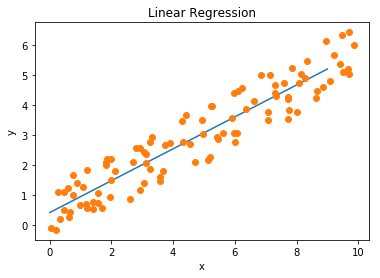

In [50]:
line = b[0]*np.arange(0, 10) + b[1]
pl.plot(line, '-')
pl.plot(xi, y, 'o')
pl.title('Linear Regression')
pl.xlabel('x')
pl.ylabel('y')
pl.show()